In [1]:
from collections import defaultdict
import datetime
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
plt.rcParams['figure.figsize'] = 10, 10

%matplotlib inline

In [2]:
df = pd.read_csv('/Users/Jordan/GitHub/DataResources/Iowa_Liquor_Sales_reduced.csv')
df.head()


/Users/Jordan/miniconda2/envs/goshawk/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,370,87152,Avion Silver,375,$9.99,$14.99,12,$179.88,4.5,1.19
1,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,395,89197,Jose Cuervo Especial Reposado Tequila,1000,$12.50,$18.75,2,$37.50,2.0,0.53
2,03/31/2016,4959,CEDAR FALLS,50613,7.0,Black Hawk,1071100.0,AMERICAN COCKTAILS,380,63959,Uv Blue Raspberry Lemonade Pet,1750,$5.97,$8.96,6,$53.76,10.5,2.77
3,03/31/2016,2190,DES MOINES,50314,77.0,Polk,1031200.0,VODKA FLAVORED,205,40597,New Amsterdam Red Berry,200,$2.24,$3.36,48,$161.28,9.6,2.54
4,03/31/2016,5240,WEST BRANCH,52358,NaN,NaN,1081200.0,CREAM LIQUEURS,305,73055,Rumchata,750,$12.50,$18.75,6,$112.50,4.5,1.19


In [3]:
# remove unnecessary columns

del df["Category Name"]
del df["Item Description"]
del df["County"]

# remove $ from columns
cols = ["State Bottle Cost", "State Bottle Retail", "Sale (Dollars)"]
for col in cols:
    df[col]= df[col].apply(lambda x:float(x[1:]))
    
# covert dates to date-time format
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y")

# drop null values
df = df.dropna()

# convert datatypes to integers
df["County Number"] = df["County Number"].astype(int)
df["Category"] = df["Category"].astype(int)

df.head()



,Date,Store Number,City,Zip Code,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2016-03-31,5029,DAVENPORT,52806,82,1022100,370,87152,375,9.99,14.99,12,179.88,4.50,1.19
1,2016-03-31,5029,DAVENPORT,52806,82,1022100,395,89197,1000,12.50,18.75,2,37.50,2.00,0.53
2,2016-03-31,4959,CEDAR FALLS,50613,7,1071100,380,63959,1750,5.97,8.96,6,53.76,10.50,2.77
3,2016-03-31,2190,DES MOINES,50314,77,1031200,205,40597,200,2.24,3.36,48,161.28,9.60,2.54
5,2016-03-31,4988,CEDAR FALLS,50613,7,1011200,260,17090,750,23.00,34.50,1,34.50,0.75,0.20


In [4]:
# filter the data 




# find the first and last sales date to determine which stores were open all of 2015

dates = df.groupby(by=['Store Number'], as_index=False)
dates = dates.agg({"Date":[np.min, np.max]})
dates.columns = [''.join(col).strip() for col in dates.columns.values]
dates

# find the stores that have opened or closed throughout the year 
lower_cutoff = pd.Timestamp("20150301")
upper_cutoff = pd.Timestamp("20151001")
mask = (dates['Dateamin'] < lower_cutoff) & (dates['Dateamax'] > upper_cutoff)
good_stores = dates[mask]["Store Number"]
df = df[df['Store Number'].isin(good_stores)]

df.head()
dates

,Store Number,Dateamin,Dateamax
0,2106,2015-01-08,2016-03-31
1,2113,2015-01-07,2016-03-30
2,2130,2015-01-08,2016-03-31
3,2152,2015-01-08,2016-02-25
4,2178,2015-01-07,2016-03-30
5,2190,2015-01-05,2016-03-31
6,2191,2015-01-05,2016-03-28
7,2200,2015-01-07,2016-03-30
8,2205,2015-01-06,2015-12-28
9,2228,2015-01-06,2016-03-29


In [5]:

# compute intermediate data to predict sales and/or profits

# margin and price per liter 
df['Margin'] = (df["State Bottle Retail"] - df['State Bottle Cost']) * df["Bottles Sold"]
df['Price per Liter'] = df['Sale (Dollars)'] / df['Volume Sold (Liters)']
df.head()

,Date,Store Number,City,Zip Code,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Margin,Price per Liter
0,2016-03-31,5029,DAVENPORT,52806,82,1022100,370,87152,375,9.99,14.99,12,179.88,4.50,1.19,60.00,39.973333
1,2016-03-31,5029,DAVENPORT,52806,82,1022100,395,89197,1000,12.50,18.75,2,37.50,2.00,0.53,12.50,18.750000
2,2016-03-31,4959,CEDAR FALLS,50613,7,1071100,380,63959,1750,5.97,8.96,6,53.76,10.50,2.77,17.94,5.120000
3,2016-03-31,2190,DES MOINES,50314,77,1031200,205,40597,200,2.24,3.36,48,161.28,9.60,2.54,53.76,16.800000
5,2016-03-31,4988,CEDAR FALLS,50613,7,1011200,260,17090,750,23.00,34.50,1,34.50,0.75,0.20,11.50,46.000000


In [52]:
# sales per store in 2015

# filter by start and end dates
df.sort_values(by=["Store Number", "Date"], inplace=True)
start_date = pd.Timestamp("20150101")
end_date = pd.Timestamp("20151231")
mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
sales = df[mask]

# group by store name
sales = sales.groupby(by=["Store Number"], as_index=False)

# compute sums and means
sales = sales.agg({"Sale (Dollars)": [np.sum, np.mean],
                   "Volume Sold (Liters)": [np.sum, np.mean],
                   "Margin": np.mean,
                   "Price per Liter": np.mean,
                   "Zip Code": lambda x: x.iloc[0],
                   "City": lambda x: x.iloc[0],
                   "County Number": lambda x: x.iloc[0]})

# rename columns
sales.columns = [' '.join(col).strip() for col in sales.columns.values]
sales.columns = [u'Store Number', u'City', u'2015 Sales',
       u'2015 Sales mean', u'County Number',
       u'Price per Liter mean', u'Zip Code',
       u'2015 Volume Sold (Liters)', u'2015 Volume Sold (Liters) mean',
       u'2015 Margin mean']

sales.head()

q1_2015_end = pd.Timestamp("20150331")
q1_mask = (df['Date'] >= start_date) & (df['Date'] <= q1_2015_end)
salesq1=df[q1_mask]
salesq1 = salesq1.groupby(by=["Store Number"], as_index = False)
salesq1 = salesq1.agg({"Sale (Dollars)": [np.sum, np.mean],
                   "Volume Sold (Liters)": [np.sum, np.mean],
                   "Margin": np.mean,
                   "Price per Liter": np.mean,
                   "Zip Code": lambda x: x.iloc[0],
                   "City": lambda x: x.iloc[0],
                   "County Number": lambda x: x.iloc[0]})


salesq1.columns = [' '.join(col).strip() for col in salesq1.columns.values]
salesq1.columns = [u'Store Number', u'City', u'2015 q1 Sales',
       u'2015 q1 Sales mean', u'County Number',
       u'Price per Liter mean', u'Zip Code',
       u'2015 q1 Volume Sold (Liters)', u'2015 q1 Volume Sold (Liters) mean',
       u'2015 q1 Margin mean']

sales.head()



q1_16_start_date = pd.Timestamp("20160101")
q1_16_end_date = pd.Timestamp("20160331")
q1_16_mask = (df["Date"]>= q1_16_start_date) & (df["Date"] <= q1_16_end_date)

q1_16_sales = df[q1_16_mask]

q1_16_sales = q1_16_sales.groupby(by=["Store Number"], as_index=False)
q1_16_sales= q1_16_sales.agg({"Sale (Dollars)": [np.sum, np.mean],
                   "Volume Sold (Liters)": [np.sum, np.mean],
                   "Margin": np.mean,
                   "Price per Liter": np.mean,
                   "Zip Code": lambda x: x.iloc[0],
                   "City": lambda x: x.iloc[0],
                   "County Number": lambda x: x.iloc[0]})
q1_16_sales
q1_16_sales.columns = [' '.join(col).strip() for col in q1_16_sales.columns.values]
q1_16_sales.columns = [u'Store Number', u'City', u'2016 q1 Sales',
       u'2016 q1 Sales mean', u'County Number',
       u'Price per Liter mean', u'Zip Code',
       u'2016 q1 Volume Sold (Liters)', u'2016 q1 Volume Sold (Liters) mean',
       u'2016 q1 Margin mean']


(1193, 10)

In [56]:
b = sales["2015 Volume Sold (Liters)"]
a = salesq1["2015 q1 Volume Sold (Liters)"]
df3  = pd.merge(sales,salesq1, how = 'left', on = "Store Number", copy = False )
df3 = df3.sort_values(by ="Store Number")

del df3['City_y']
del df3['Zip Code_y']
del df3['Price per Liter mean_y']
del df3['County Number_y']

def count_missing(frame):
    return (frame.shape[0] * frame.shape[1]) - frame.count().sum()
df3.groupby('Store Number').apply(count_missing)



df4 = pd.merge(df3,q1_16_sales, how= 'left', on= "Store Number", copy=False)
df4 = df4.sort_values(by="Store Number")
df4.head()

,Store Number,City_x,2015 Sales,2015 Sales mean,County Number_x,Price per Liter mean_x,Zip Code_x,2015 Volume Sold (Liters),2015 Volume Sold (Liters) mean,2015 Margin mean,...,2015 q1 Margin mean,City,2016 q1 Sales,2016 q1 Sales mean,County Number,Price per Liter mean,Zip Code,2016 q1 Volume Sold (Liters),2016 q1 Volume Sold (Liters) mean,2016 q1 Margin mean
0,2106,CEDAR FALLS,1434021.94,281.070549,7,18.846731,50613,93982.72,18.420760,93.802281,...,92.871724,CEDAR FALLS,337804.05,274.860903,7.0,18.108258,50613,22277.95,18.126892,91.670415
1,2113,GOWRIE,85763.42,63.015004,94,17.625704,50543,6500.83,4.776510,21.082425,...,22.291493,GOWRIE,21736.63,55.309491,94.0,17.630111,50543,1608.07,4.091781,18.473537
2,2130,WATERLOO,1108184.99,280.624206,7,17.506599,50703,65562.88,16.602401,93.612494,...,99.634075,WATERLOO,306942.27,295.420857,7.0,17.046762,50703,18172.75,17.490616,98.523378
3,2152,ROCKWELL,72080.36,50.230216,17,13.043590,50469,6164.92,4.296111,16.824704,...,16.543088,ROCKWELL,9307.75,42.696101,17.0,14.194331,50469,799.39,3.666927,14.315505
4,2178,WAUKON,277987.96,104.389020,3,16.594438,52172,21719.49,8.156023,35.011457,...,33.800761,WAUKON,58939.90,98.397162,3.0,16.942985,52172,4606.64,7.690551,32.886995


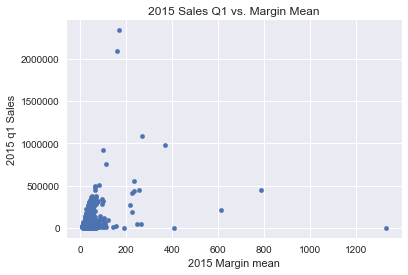

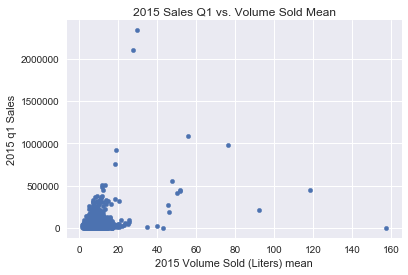

In [41]:
# exploratory analysis

# 2015 sales q1 v. margin mean
df3.plot.scatter(x='2015 Margin mean', y='2015 q1 Sales')
plt.title('2015 Sales Q1 vs. Margin Mean')


# 2015 sales q1 v. volume sold mean 
df3.plot.scatter(x='2015 Volume Sold (Liters) mean', y='2015 q1 Sales')
plt.title('2015 Sales Q1 vs. Volume Sold Mean')
plt.show()




/Users/Jordan/miniconda2/envs/goshawk/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Model fit: 0.984003364332
4.24823742974 11550.5139474


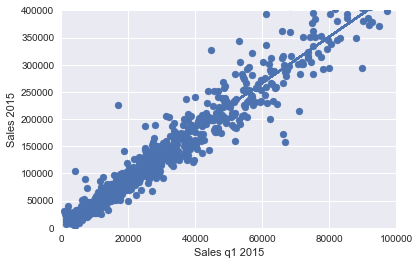

In [42]:
# fit a linear model

lm = linear_model.LinearRegression()
X = df3[['2015 q1 Sales']]
y = df3['2015 Sales']
lm.fit(X, y)
predictions = lm.predict(X)
print "Model fit:", lm.score(X, y)
print lm.coef_[0], lm.intercept_

plt.scatter(X, y)
plt.plot(X, predictions)
plt.xlabel("Sales q1 2015")
plt.ylabel("Sales 2015")
plt.xlim(0, 100000)
plt.ylim(0, 400000)
plt.show()

In [64]:

df4['2016 q1 Sales'].fillna((df4['2016 q1 Sales'].mean()), inplace=True)


In [65]:
# predict 2016 sales

# fit linear model

X = df4[['2016 q1 Sales']]
predictions = lm.predict(X)
total_2016 = sum(predictions)
total_2015 = sum(df4['2015 Sales'])
X2 = df4[["2015 q1 Sales"]]
pred_2015 = sum(lm.predict(X2))

print "2015 predicted", pred_2015
print "2015 actual", total_2015
print "2016 predicted", total_2016

2015 predicted 273898622.67
2015 actual 273898622.67
2016 predicted 278369658.963


1193
Model fit: 0.984003364332


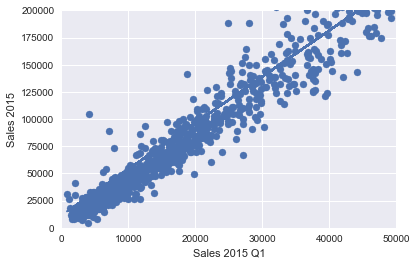

In [71]:

# fit linear model

lm = linear_model.LinearRegression()
X = df4[["2015 q1 Sales"]]
print len(X)
y = df4["2015 Sales"]
lm.fit(X, y)
predictions = lm.predict(X)
print "Model fit:", lm.score(X, y)


plt.scatter(X, y)
plt.plot(X, predictions)
plt.xlabel("Sales 2015 Q1")
plt.ylabel("Sales 2015")
plt.xlim(0, 50000)
plt.ylim(0, 200000)
plt.show()

In [73]:
X = df4[["2016 q1 Sales"]]
predictions = lm.predict(X)
total_2016 = sum(predictions)
total_2015 = sum(df4["2015 Sales"])
X2 = df4[["2015 q1 Sales"]]
pred_2015 = sum(lm.predict(X2))

print "2015 predicted", pred_2015
print "2015 actual", total_2015
print "2016 predicted", total_2016

2015 predicted 273898622.67
2015 actual 273898622.67
2016 predicted 278369658.963


1193
Model fit: 0.983997725173


..........................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.1s finished


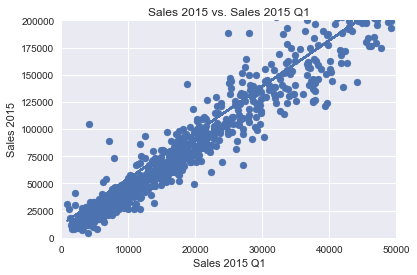

In [75]:
# regularization with elastic net 

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.cross_validation import cross_val_score
from sklearn import linear_model
from sklearn.metrics import r2_score

l1_ratios = np.linspace(0.01, 1.0, 5)
lm = linear_model.ElasticNetCV(l1_ratio=l1_ratios, n_alphas=10, cv=5,
                            verbose=1)
X = df4[["2015 q1 Sales"]]
print len(X)
y = df4["2015 Sales"]
lm.fit(X, y)
predictions = lm.predict(X)
print "Model fit:", lm.score(X, y)

plt.scatter(X, y)
plt.plot(X, predictions)
plt.xlabel("Sales 2015 Q1")
plt.ylabel("Sales 2015")
plt.title("Sales 2015 vs. Sales 2015 Q1")
plt.xlim(0, 50000)
plt.ylim(0, 200000)
plt.show()

In [77]:
X = df4[["2016 q1 Sales"]]
predictions = lm.predict(X)
total_2016 = sum(predictions)
total_2015 = sum(df4["2015 Sales"])
X2 = df4[["2015 q1 Sales"]]
pred_2015 = sum(lm.predict(X2))

print "2015 predicted", pred_2015
print "2015 actual", total_2015
print "2016 predicted", total_2016

2015 predicted 273898622.67
2015 actual 273898622.67
2016 predicted 278358955.678


In [81]:
df4["15-16 q1 Sales Growth"] = df4["2016 q1 Sales"] - df4["2015 q1 Sales"]
df4['2016 Predicted Sales']= predictions
df4.head()

,Store Number,City_x,2015 Sales,2015 Sales mean,County Number_x,Price per Liter mean_x,Zip Code_x,2015 Volume Sold (Liters),2015 Volume Sold (Liters) mean,2015 Margin mean,...,2016 q1 Sales,2016 q1 Sales mean,County Number,Price per Liter mean,Zip Code,2016 q1 Volume Sold (Liters),2016 q1 Volume Sold (Liters) mean,2016 q1 Margin mean,15-16 q1 Sales Growth,2016 Predicted Sales
0,2106,CEDAR FALLS,1434021.94,281.070549,7,18.846731,50613,93982.72,18.420760,93.802281,...,337804.05,274.860903,7.0,18.108258,50613,22277.95,18.126892,91.670415,637.52,1.443709e+06
1,2113,GOWRIE,85763.42,63.015004,94,17.625704,50543,6500.83,4.776510,21.082425,...,21736.63,55.309491,94.0,17.630111,50543,1608.07,4.091781,18.473537,-615.23,1.041938e+05
2,2130,WATERLOO,1108184.99,280.624206,7,17.506599,50703,65562.88,16.602401,93.612494,...,306942.27,295.420857,7.0,17.046762,50703,18172.75,17.490616,98.523378,29177.81,1.312915e+06
3,2152,ROCKWELL,72080.36,50.230216,17,13.043590,50469,6164.92,4.296111,16.824704,...,9307.75,42.696101,17.0,14.194331,50469,799.39,3.666927,14.315505,-7497.36,5.151935e+04
4,2178,WAUKON,277987.96,104.389020,3,16.594438,52172,21719.49,8.156023,35.011457,...,58939.90,98.397162,3.0,16.942985,52172,4606.64,7.690551,32.886995,4528.48,2.618638e+05


In [82]:
df4.to_csv('/Users/Jordan/GitHub/DataResources/Iowa_Liquor_Sales_combined_df4.csv')